In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AirbnbData_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,48150,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,42,2020-03-22,0.45,2,365,Hawaii
1,48151,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,124,30,10,2020-01-03,0.09,5,261,Hawaii
2,48152,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,85,5,168,2020-03-18,1.30,3,242,Hawaii
3,48153,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,239,6,20,2020-03-22,0.24,3,287,Hawaii
4,48154,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,143,2020-10-08,1.03,1,116,Hawaii


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,42,2020-03-22,0.45,2,365,Hawaii
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,124,30,10,2020-01-03,0.09,5,261,Hawaii
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,85,5,168,2020-03-18,1.30,3,242,Hawaii
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,239,6,20,2020-03-22,0.24,3,287,Hawaii
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,143,2020-10-08,1.03,1,116,Hawaii


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85144 entries, 0 to 85143
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85144 non-null  int64  
 1   name                            85144 non-null  object 
 2   host_id                         85144 non-null  int64  
 3   host_name                       85144 non-null  object 
 4   neighbourhood_group             85144 non-null  object 
 5   neighbourhood                   85144 non-null  object 
 6   latitude                        85144 non-null  float64
 7   longitude                       85144 non-null  float64
 8   room_type                       85144 non-null  object 
 9   price                           85144 non-null  int64  
 10  minimum_nights                  85144 non-null  int64  
 11  number_of_reviews               85144 non-null  int64  
 12  last_review                     

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

<AxesSubplot:xlabel='city', ylabel='price'>

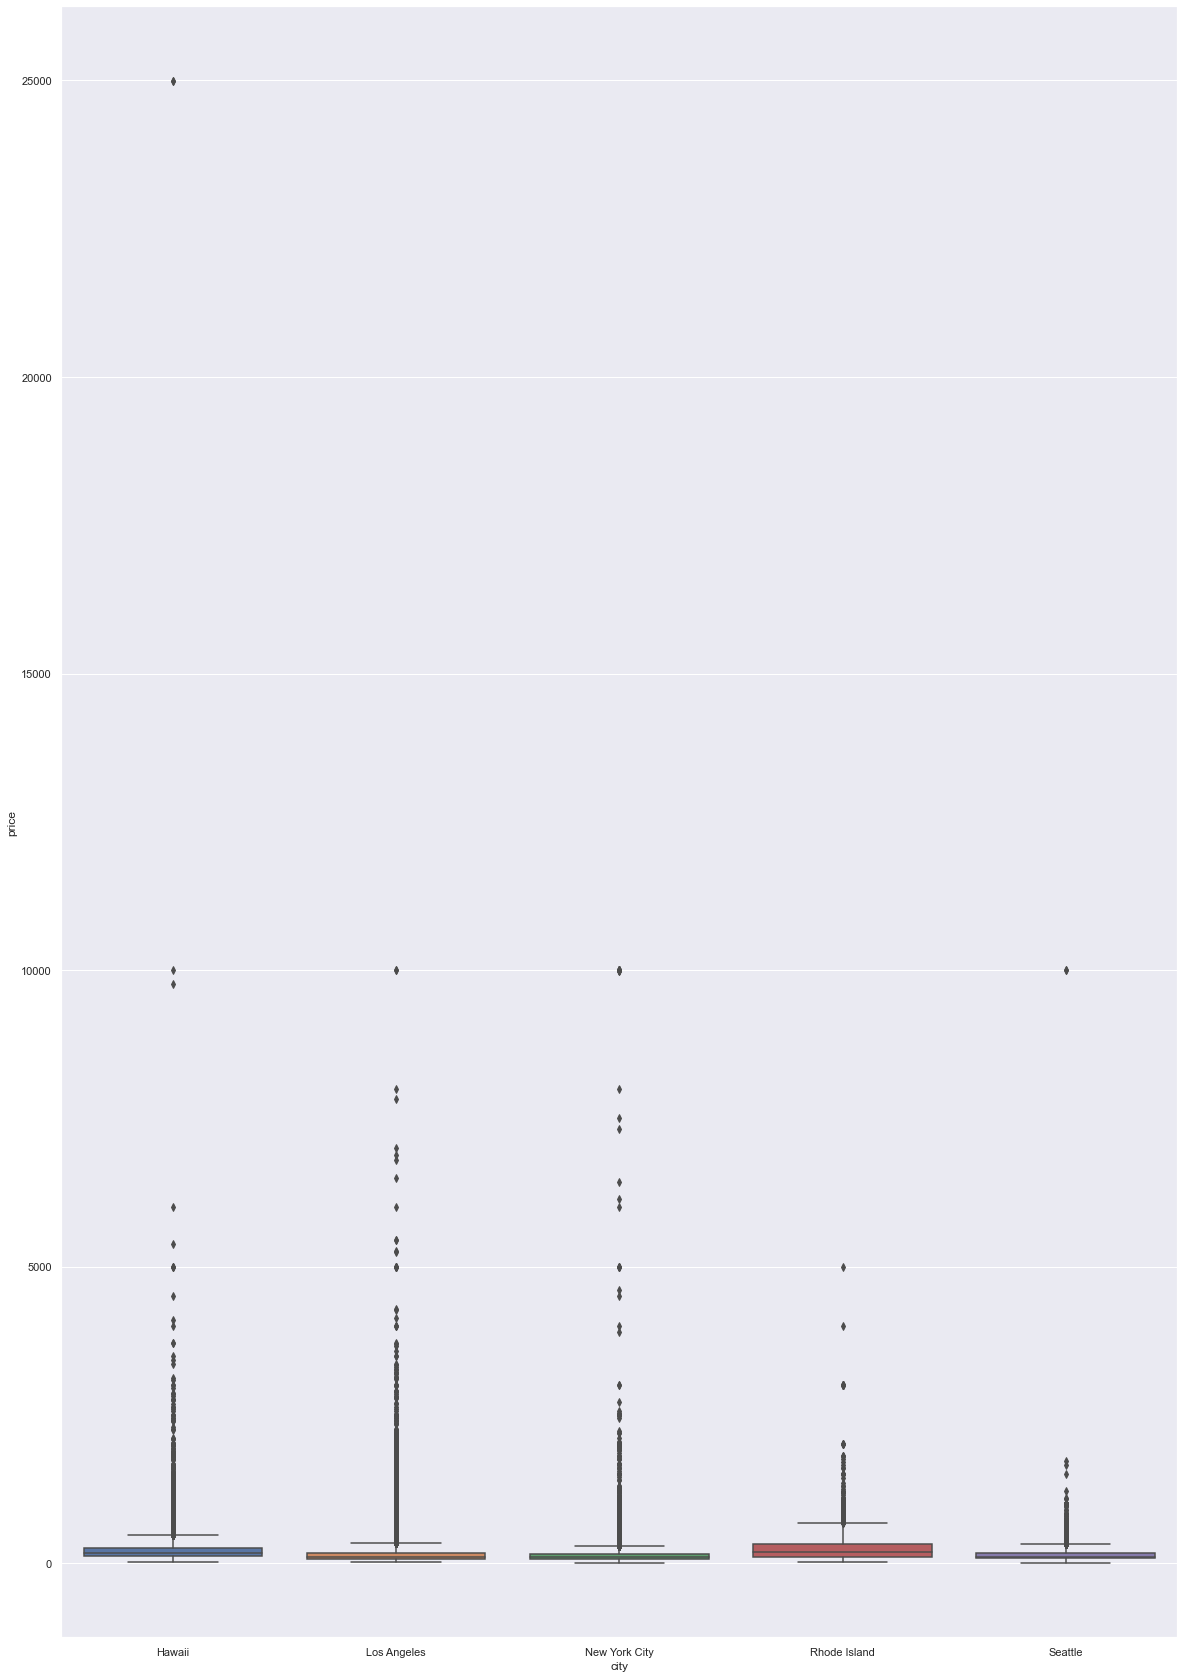

In [37]:
sns.set(rc={'figure.figsize':(20,30)})
sns.boxplot(data = df, x='city', y='price')


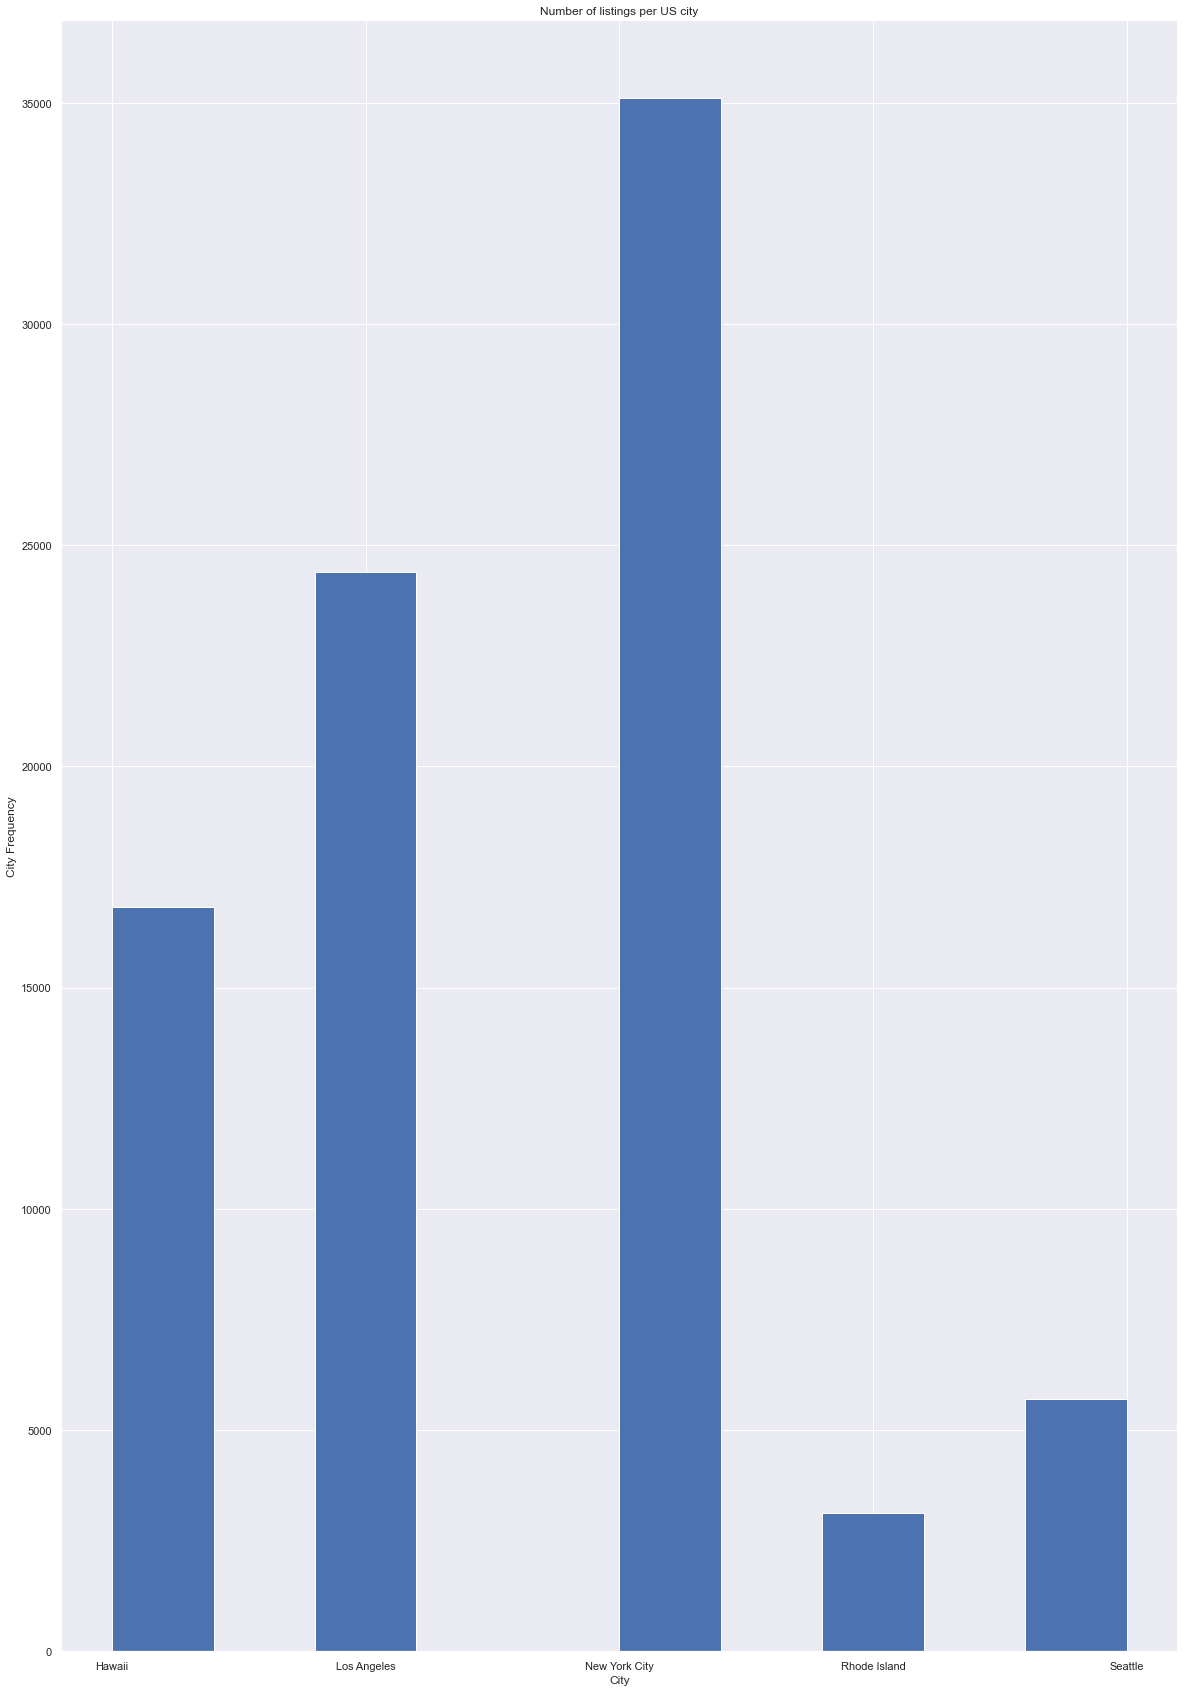

In [38]:
plt.hist(data=df, x='city')
plt.ylabel('City Frequency')
plt.xlabel('City')
plt.title('Number of listings per US city')
plt.show()

<AxesSubplot:xlabel='room_type', ylabel='price'>

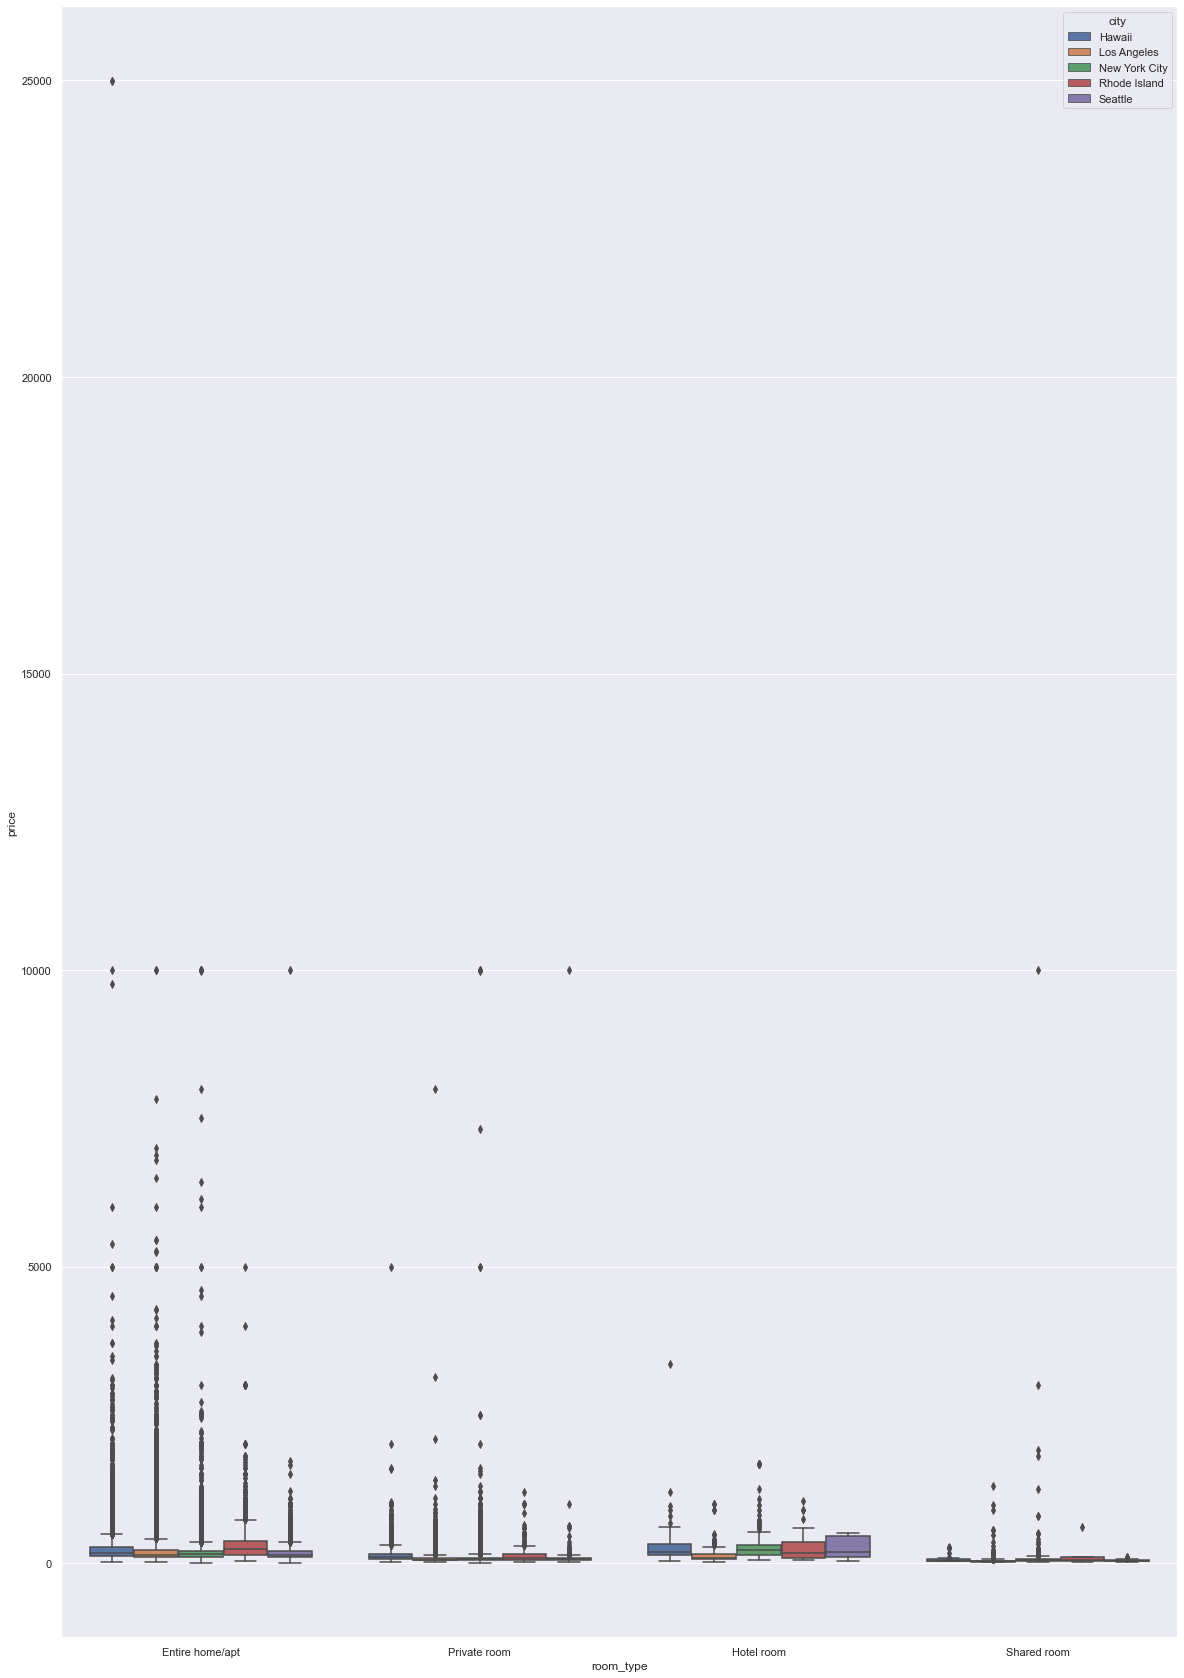

In [41]:
sns.boxplot(data=df, x='room_type', y='price', hue='city')